![](https://raw.githubusercontent.com/rafneta/RNlibro/master/imagenes/banner.png)

```{contents}
:depth: 4
```

# Pandas


- [Página principal de Pandas](https://pandas.pydata.org/docs/index.html)
- [Documentación](https://pandas.pydata.org/docs/reference/index.html)

Tomamos una muestra de la guía rápida de Pandas ([10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html)), junto con un par de complementos.


## Creamos objetos


In [3]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [6]:
dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [7]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,-0.255445,1.309822,-0.168210,-0.584129
2013-01-02,0.440632,0.473918,0.092115,0.994856
2013-01-03,1.140755,-0.288707,1.075470,1.245641
2013-01-04,1.471408,-1.539870,1.272889,1.255482
2013-01-05,-1.197831,-0.139475,1.067496,-0.351955
2013-01-06,0.203198,-0.573590,1.523726,-0.788816


In [8]:
df2 = pd.DataFrame(

    {

        "A": 1.0,

        "B": pd.Timestamp("20130102"),

        "C": pd.Series(1, index=list(range(4)), dtype="float32"),

        "D": np.array([3] * 4, dtype="int32"),

        "E": pd.Categorical(["test", "train", "test", "train"]),

        "F": "foo",

    }

)

df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [9]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

Dependiendo del editor de texto, se puede utilizar `<TAB>` para tener un despliegue de métodos.
   
Normalmente tenemos un archivo (local o remoto), con los datos. Tomaremos un ejemplo del repositorio de datos de [UCI, Machine Learning Repository](https://archive-beta.ics.uci.edu/)


Se tomará el siguiente conjunto de datos [Adult](https://archive-beta.ics.uci.edu/ml/datasets/adult) (1996). UCI Machine Learning Repository.

- age: continuous.

- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

- fnlwgt: continuous.

- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

- education-num: continuous.

- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

- sex: Female, Male.

- capital-gain: continuous.

- capital-loss: continuous.

- hours-per-week: continuous.

- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



In [12]:
datos = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')
datos

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [13]:
datos = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
    header = None)
datos

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [23]:
columnas = ["age", "workclass", "fnlwgt", "education", "education_num",
            "marital_status", "occupation","relationship", "race", "sex",
            "capital_gain","capital_loss","hours-per-week", "native-country", "class"]

datos = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
    header = None,
    names = columnas
    )
datos

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Desplegar los datos



In [24]:
df.head()

,A,B,C,D
2013-01-01,-0.255445,1.309822,-0.168210,-0.584129
2013-01-02,0.440632,0.473918,0.092115,0.994856
2013-01-03,1.140755,-0.288707,1.075470,1.245641
2013-01-04,1.471408,-1.539870,1.272889,1.255482
2013-01-05,-1.197831,-0.139475,1.067496,-0.351955


In [25]:
df.tail()

,A,B,C,D
2013-01-02,0.440632,0.473918,0.092115,0.994856
2013-01-03,1.140755,-0.288707,1.075470,1.245641
2013-01-04,1.471408,-1.539870,1.272889,1.255482
2013-01-05,-1.197831,-0.139475,1.067496,-0.351955
2013-01-06,0.203198,-0.573590,1.523726,-0.788816


In [27]:
df.to_numpy()

array([[-0.25544475,  1.30982242, -0.16820985, -0.58412855],
       [ 0.44063178,  0.47391843,  0.09211497,  0.99485562],
       [ 1.14075548, -0.28870699,  1.07547046,  1.24564126],
       [ 1.47140771, -1.53987018,  1.27288894,  1.25548203],
       [-1.19783097, -0.13947515,  1.06749632, -0.35195464],
       [ 0.20319828, -0.57359001,  1.52372616, -0.78881627]])

In [28]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [29]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.300453,-0.126317,0.810581,0.295180
std,0.965425,0.964107,0.683038,0.967690
min,-1.197831,-1.539870,-0.168210,-0.788816
25%,-0.140784,-0.502369,0.335960,-0.526085
50%,0.321915,-0.214091,1.071483,0.321450
75%,0.965725,0.320570,1.223534,1.182945
max,1.471408,1.309822,1.523726,1.255482


In [30]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.255445,0.440632,1.140755,1.471408,-1.197831,0.203198
B,1.309822,0.473918,-0.288707,-1.539870,-0.139475,-0.573590
C,-0.168210,0.092115,1.075470,1.272889,1.067496,1.523726
D,-0.584129,0.994856,1.245641,1.255482,-0.351955,-0.788816


In [31]:
df.sort_index(axis = 1, ascending = False)

,D,C,B,A
2013-01-01,-0.584129,-0.168210,1.309822,-0.255445
2013-01-02,0.994856,0.092115,0.473918,0.440632
2013-01-03,1.245641,1.075470,-0.288707,1.140755
2013-01-04,1.255482,1.272889,-1.539870,1.471408
2013-01-05,-0.351955,1.067496,-0.139475,-1.197831
2013-01-06,-0.788816,1.523726,-0.573590,0.203198


In [32]:
df.sort_values(by="B")

,A,B,C,D
2013-01-04,1.471408,-1.539870,1.272889,1.255482
2013-01-06,0.203198,-0.573590,1.523726,-0.788816
2013-01-03,1.140755,-0.288707,1.075470,1.245641
2013-01-05,-1.197831,-0.139475,1.067496,-0.351955
2013-01-02,0.440632,0.473918,0.092115,0.994856
2013-01-01,-0.255445,1.309822,-0.168210,-0.584129


## Selección

In [33]:
df["A"]

2013-01-01   -0.255445
2013-01-02    0.440632
2013-01-03    1.140755
2013-01-04    1.471408
2013-01-05   -1.197831
2013-01-06    0.203198
Freq: D, Name: A, dtype: float64

In [34]:
df[0:3]

,A,B,C,D
2013-01-01,-0.255445,1.309822,-0.168210,-0.584129
2013-01-02,0.440632,0.473918,0.092115,0.994856
2013-01-03,1.140755,-0.288707,1.075470,1.245641


In [41]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,0.440632,0.473918,0.092115,0.994856
2013-01-03,1.140755,-0.288707,1.075470,1.245641
2013-01-04,1.471408,-1.539870,1.272889,1.255482


### Selección con etiqueta

In [36]:
df.loc[dates[0]]

A   -0.255445
B    1.309822
C   -0.168210
D   -0.584129
Name: 2013-01-01 00:00:00, dtype: float64

In [37]:
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,-0.255445,1.309822
2013-01-02,0.440632,0.473918
2013-01-03,1.140755,-0.288707
2013-01-04,1.471408,-1.539870
2013-01-05,-1.197831,-0.139475
2013-01-06,0.203198,-0.573590


In [38]:
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,0.440632,0.473918
2013-01-03,1.140755,-0.288707
2013-01-04,1.471408,-1.539870


In [39]:
df.loc["20130102", ["A", "B"]]

A    0.440632
B    0.473918
Name: 2013-01-02 00:00:00, dtype: float64

In [40]:
df.loc[dates[0], "A"]

-0.2554447489300441

### Selección por posición 

In [42]:
df.iloc[3]

A    1.471408
B   -1.539870
C    1.272889
D    1.255482
Name: 2013-01-04 00:00:00, dtype: float64

In [43]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,1.471408,-1.539870
2013-01-05,-1.197831,-0.139475


In [44]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,0.440632,0.092115
2013-01-03,1.140755,1.075470
2013-01-05,-1.197831,1.067496


In [45]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,0.440632,0.473918,0.092115,0.994856
2013-01-03,1.140755,-0.288707,1.075470,1.245641


### Indexado lógico

In [46]:
df[df["A"] > 0]

,A,B,C,D
2013-01-02,0.440632,0.473918,0.092115,0.994856
2013-01-03,1.140755,-0.288707,1.075470,1.245641
2013-01-04,1.471408,-1.539870,1.272889,1.255482
2013-01-06,0.203198,-0.573590,1.523726,-0.788816


In [47]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,1.309822,NaN,NaN
2013-01-02,0.440632,0.473918,0.092115,0.994856
2013-01-03,1.140755,NaN,1.075470,1.245641
2013-01-04,1.471408,NaN,1.272889,1.255482
2013-01-05,NaN,NaN,1.067496,NaN
2013-01-06,0.203198,NaN,1.523726,NaN


### Asignación

In [49]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [52]:
df.loc[:, "D"] = np.array([5] * len(df))
df

,A,B,C,D
2013-01-01,0.000000,1.309822,-0.168210,5
2013-01-02,0.440632,0.473918,0.092115,5
2013-01-03,1.140755,-0.288707,1.075470,5
2013-01-04,1.471408,-1.539870,1.272889,5
2013-01-05,-1.197831,-0.139475,1.067496,5
2013-01-06,0.203198,-0.573590,1.523726,5


## Datos Faltantes

In [53]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0] : dates[1], "E"] = 1
df1

,A,B,C,D,E
2013-01-01,0.000000,1.309822,-0.168210,5,1.0
2013-01-02,0.440632,0.473918,0.092115,5,1.0
2013-01-03,1.140755,-0.288707,1.075470,5,NaN
2013-01-04,1.471408,-1.539870,1.272889,5,NaN


In [54]:
df1.dropna(how="any")

,A,B,C,D,E
2013-01-01,0.000000,1.309822,-0.168210,5,1.0
2013-01-02,0.440632,0.473918,0.092115,5,1.0


In [55]:
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,0.000000,1.309822,-0.168210,5,1.0
2013-01-02,0.440632,0.473918,0.092115,5,1.0
2013-01-03,1.140755,-0.288707,1.075470,5,5.0
2013-01-04,1.471408,-1.539870,1.272889,5,5.0


In [56]:
pd.isna(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


## Operaciones

In [58]:
df.mean()

A    0.343027
B   -0.126317
C    0.810581
D    5.000000
dtype: float64

In [59]:
df.mean(1)

2013-01-01    1.535403
2013-01-02    1.501666
2013-01-03    1.731880
2013-01-04    1.551107
2013-01-05    1.182548
2013-01-06    1.538334
Freq: D, dtype: float64

In [60]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.000000,1.309822,-0.168210,5
2013-01-02,0.440632,1.783741,-0.076095,10
2013-01-03,1.581387,1.495034,0.999376,15
2013-01-04,3.052795,-0.044836,2.272265,20
2013-01-05,1.854964,-0.184311,3.339761,25
2013-01-06,2.058162,-0.757901,4.863487,30


## Gráficas

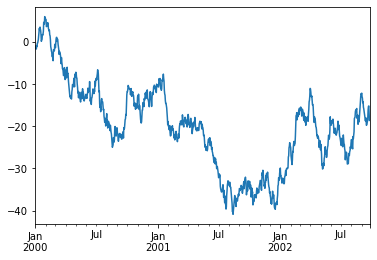

In [64]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot(); # Investigar tarea moral

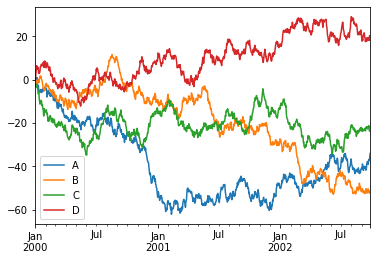

In [67]:
df = pd.DataFrame(

    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]

)

df = df.cumsum()
df.plot();


## Guardar

In [68]:
df.to_csv("foo.csv")

In [69]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")